#Pre-processing data

##Load Dataset

In [18]:
!gdown "16h_mWdWCsAQeO2cu_AccT1d1pW9WP60t"

Downloading...
From: https://drive.google.com/uc?id=16h_mWdWCsAQeO2cu_AccT1d1pW9WP60t
To: /content/data_ws.zip
100% 21.8M/21.8M [00:00<00:00, 165MB/s]


In [19]:
!unzip data_ws.zip

Archive:  data_ws.zip
replace data_ws/ws_0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


(240, 426, 3)


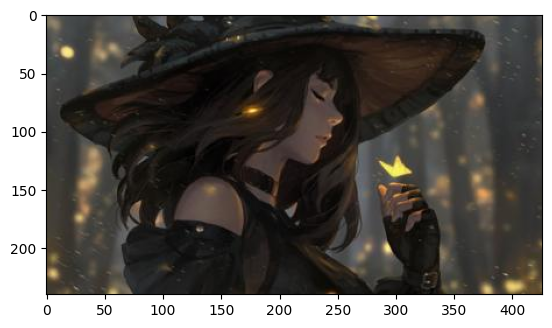

In [20]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data_ws/ws_0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

##Splitting dataset to train, test and val

In [21]:
import os
import random
import pandas as pd

# Path to your image folder
data_ws_dir = "/content/data_ws/"

# Get all image file paths
all_images = [os.path.join(data_ws_dir, filename) for filename in os.listdir(data_ws_dir)]

# Shuffle the paths randomly
random.shuffle(all_images)

# Split paths
train_data_ws = all_images[:967]
remaining_data_ws = all_images[967:]
test_data_ws = remaining_data_ws[:len(remaining_data_ws)//2]
val_data_ws = remaining_data_ws[len(remaining_data_ws)//2:]

print(f"Images have been randomly distributed: {len(train_data_ws)} to train, {len(test_data_ws)} to test, and {len(val_data_ws)} to val subfolders.")

Images have been randomly distributed: 967 to train, 121 to test, and 121 to val subfolders.


#Model Implementation

###Define models

In [22]:
import tensorflow as tf
from keras.applications import VGG19, ResNet50, ResNet50V2, InceptionV3, InceptionResNetV2, Xception
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

A custom CNN model

In [23]:
def custom_cnn_model():
    # Initialize the model
    model = Sequential()

    # Add a convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(240, 426, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add another convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add another convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add another convolutional layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add another convolutional layer
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the tensor output from the previous layer
    model.add(Flatten())

    # Add a dense layer
    model.add(Dense(1024, activation='relu'))

    # Add a dropout layer for regularization
    model.add(Dropout(0.5))

    # Add another dense layer
    model.add(Dense(512, activation='relu'))

    # Add another dense layer
    model.add(Dense(256, activation='relu'))

    # Add the output layer
    model.add(Dense(1, activation='sigmoid'))  # binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [24]:
vgg19 = VGG19(weights='imagenet', include_top=False)
resnet50 = ResNet50(weights='imagenet', include_top=False)
inceptionv3 = InceptionV3(weights='imagenet', include_top=False)
inceptionresnetv2 = InceptionResNetV2(weights='imagenet', include_top=False)
xception = Xception(weights='imagenet', include_top=False)
customCNN = custom_cnn_model()

In [25]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from keras.applications.inception_v3 import preprocess_input as inceptionv3_preprocess_input
from keras.applications.inception_resnet_v2 import preprocess_input as inceptionresnetv2_preprocess_input
from keras.applications.xception import preprocess_input as xception_preprocess_input

In [26]:
def customCNN_preprocess_input(input_array):
    # Resize the images to the correct dimensions if necessary
    # ...

    # Normalize the pixel values (this is just an example, adjust as needed)
    input_array = input_array / 255.0

    return input_array

###Continue

In [27]:
import numpy as np

In [28]:
def load_images(image_paths):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(240, 426))
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

train_images = load_images(all_images)

In [29]:
input_image_path = val_data_ws[9]
input_image = load_img(input_image_path, target_size=(240, 426))
input_array = img_to_array(input_image)
input_array = np.expand_dims(input_array, axis=0)

In [30]:
input_vgg19 = vgg19_preprocess_input(input_array)
input_resnet50 = resnet50_preprocess_input(input_array)
input_inceptionv3 = inceptionv3_preprocess_input(input_array)
input_inceptionresnetv2 = inceptionresnetv2_preprocess_input(input_array)
input_xception = xception_preprocess_input(input_array)
input_customCNN = customCNN_preprocess_input(input_array)

input_vgg19_features = vgg19.predict(input_vgg19)
input_resnet50_features = resnet50.predict(input_resnet50)
input_inceptionv3_features = inceptionv3.predict(input_inceptionv3)
input_inceptionresnetv2_features = inceptionresnetv2.predict(input_inceptionresnetv2)
input_xception_features = xception.predict(input_xception)
input_customCNN_features = customCNN.predict(input_customCNN)

1/1 [==============================] - 0s 191ms/step


In [31]:
# Flatten the features from each model
vgg19_features = input_vgg19_features.flatten()
resnet50_features = input_resnet50_features.flatten()
inceptionv3_features = input_inceptionv3_features.flatten()
inceptionresnetv2_features = input_inceptionresnetv2_features.flatten()
xception_features = input_xception_features.flatten()
customCNN_features = input_customCNN_features.flatten()

###TRAINING with data

In [32]:
# Preprocess your training images and Use VGG19 to predict the features of your training images
train_images_vgg19 = vgg19_preprocess_input(train_images)
train_images_vgg19_features = vgg19.predict(train_images_vgg19)

38/38 [==============================] - 1578s 42s/step


In [33]:
# ResNet50
train_images_resnet50 = resnet50_preprocess_input(train_images)
train_images_resnet50_features = resnet50.predict(train_images_resnet50)

38/38 [==============================] - 467s 12s/step


In [ ]:
# InceptionV3
train_images_inceptionv3 = inceptionv3_preprocess_input(train_images)
train_images_inceptionv3_features = inceptionv3.predict(train_images_resnet50)

In [ ]:
# InceptionResNetV2,
train_images_inceptionresnetv2 = inceptionresnetv2_preprocess_input(train_images)
train_images_inceptionresnetv2_features = inceptionresnetv2.predict(train_images_resnet50)

In [ ]:
# Xception
train_images_xception = xception_preprocess_input(train_images)
train_images_xception_features = xception.predict(train_images_resnet50)

In [ ]:
# CustomCNN
train_images_customCNN = customCNN_preprocess_input(train_images)
train_images_customCNN_features = customCNN.predict(train_images_resnet50)

###Flatten the features

In [ ]:
# Flatten the 4D array into a 2D array
input_vgg19_features_flat = input_vgg19_features.reshape(input_vgg19_features.shape[0], -1)
train_images_vgg19_features_flat = train_images_vgg19_features.reshape(train_images_vgg19_features.shape[0], -1)

In [ ]:
# Flatten the 4D array into a 2D array for ResNet50 features
input_resnet50_features_flat = input_resnet50_features.reshape(input_resnet50_features.shape[0], -1)
train_images_resnet50_features_flat = train_images_resnet50_features.reshape(train_images_resnet50_features.shape[0], -1)

In [ ]:
# InceptionV3
input_inceptionv3_features_flat = input_inceptionv3_features.reshape(input_inceptionv3_features.shape[0], -1)
train_images_inceptionv3_features_flat = train_images_inceptionv3_features.reshape(train_images_inceptionv3_features.shape[0], -1)

In [ ]:
# InceptionResNetV2
input_inceptionresnetv2_features_flat = input_inceptionresnetv2_features.reshape(input_inceptionresnetv2_features.shape[0], -1)
train_images_inceptionresnetv2_features_flat = train_images_inceptionresnetv2_features.reshape(train_images_inceptionresnetv2_features.shape[0], -1)

In [ ]:
# Xception
input_xception_features_flat = input_xception_features.reshape(input_xception_features.shape[0], -1)
train_images_xception_features_flat = train_images_xception_features.reshape(train_images_xception_features.shape[0], -1)

In [ ]:
# CustomCNN
input_customCNN_features_flat = input_customCNN_features.reshape(input_customCNN_features.shape[0], -1)
train_images_customCNN_features_flat = train_images_customCNN_features.reshape(train_images_customCNN_features.shape[0], -1)

###Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_similarity(input_features, train_features):
    similarity_scores = cosine_similarity(input_features, train_features)
    return similarity_scores

# Compute similarity scores for VGG19 features
similarity_scores = cosine_similarity(input_vgg19_features_flat, train_images_vgg19_features_flat)
similarity_scores_flat = similarity_scores.flatten()

# Compute similarity scores for ResNet50 features
similarity_scores_resnet50 = cosine_similarity(input_resnet50_features_flat, train_images_resnet50_features_flat)
similarity_scores_resnet50_flat = similarity_scores_resnet50.flatten()

# Compute similarity scores for InceptionV3 features
similarity_scores_inceptionv3 = cosine_similarity(input_inceptionv3_features_flat, train_images_inceptionv3_features_flat)
similarity_scores_inceptionv3_flat = similarity_scores_inceptionv3.flatten()

# Compute similarity scores for InceptionResNetV2 features
similarity_scores_inceptionresnetv2 = cosine_similarity(input_inceptionresnetv2_features_flat, train_images_inceptionresnetv2_features_flat)
similarity_scores_inceptionresnetv2_flat = similarity_scores_inceptionresnetv2.flatten()

# Compute similarity scores for Xception features
similarity_scores_xception = cosine_similarity(input_xception_features_flat, train_images_xception_features_flat)
similarity_scores_xception_flat = similarity_scores_xception.flatten()

# Compute similarity scores for CustomCNN features
similarity_scores_customCNN = cosine_similarity(input_customCNN_features_flat, train_images_customCNN_features_flat)
similarity_scores_customCNN_flat = similarity_scores_customCNN.flatten()




# Get indices of images sorted by similarity scores
sorted_indices_vgg19 = np.argsort(similarity_scores_flat)
# Get indices of images sorted by similarity scores for ResNet50 features
sorted_indices_resnet50 = np.argsort(similarity_scores_resnet50_flat)
sorted_indices_inceptionv3 = np.argsort(similarity_scores_inceptionv3_flat)
sorted_indices_inceptionresnetv2 = np.argsort(similarity_scores_inceptionresnetv2_flat)
sorted_indices_xception = np.argsort(similarity_scores_xception_flat)
sorted_indices_customCNN = np.argsort(similarity_scores_customCNN_flat)



# Get top 5 most similar images
top_5_indices_vgg19 = sorted_indices_vgg19[-5:]
# Get top 5 most similar images for ResNet50 features
top_5_indices_resnet50 = sorted_indices_resnet50[-5:]
top_5_indices_inceptionv3 = sorted_indices_inceptionv3[-5:]
top_5_indices_inceptionresnetv2 = sorted_indices_inceptionresnetv2[-5:]
top_5_indices_xception = sorted_indices_xception[-5:]
top_5_indices_customCNN = sorted_indices_customCNN[-5:]




# Get similarity scores of top 5 images
top_5_similarity_scores_vgg19 = [similarity_scores_flat[i] for i in top_5_indices_vgg19]
# Get similarity scores of top 5 images for ResNet50 features
top_5_similarity_scores_resnet50 = [similarity_scores_resnet50_flat[i] for i in top_5_indices_resnet50]

# Print similarity scores of top 5 images
for idx in top_5_indices_vgg19:
    print(f"Image {idx} Similarity Score: {top_5_similarity_scores_vgg19[idx]}")

# Print similarity scores of top 5 images for ResNet50 features
for idx in top_5_indices_resnet50:
    print(f"Image {idx} Similarity Score (ResNet50): {similarity_scores_resnet50_flat[idx]}")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_images(image_paths, similarity_scores):
    fig = plt.figure(figsize=(20, 10))

    # Display input image
    ax = fig.add_subplot(1, 6, 1)
    img = mpimg.imread(image_paths[0])
    ax.imshow(img)
    ax.set_title("Input Image")

    # Display top 5 similar images
    for i in range(5):
        ax = fig.add_subplot(1, 6, i+2)
        img = mpimg.imread(image_paths[i+1])
        ax.imshow(img)
        image_name = os.path.basename(image_paths[i+1])
        ax.set_title(f"Similar Image {i+1}\n Image Name: {image_name}\n Similarity: {similarity_scores[i]:.2%}")

    plt.tight_layout()
    plt.show()

# Get paths of top 5 similar images
top_5_image_paths = [train_data_ws[i] for i in top_5_indices]
top_5_image_paths_resnet50 = [train_data_ws[i] for i in top_5_indices_resnet50]

# Add the input image path to the beginning of the list
image_paths = [input_image_path] + top_5_image_paths
image_paths_resnet50 = [input_image_path] + top_5_image_paths_resnet50

# Visualize images
visualize_images(image_paths, top_5_similarity_scores)
visualize_images(image_paths_resnet50, top_5_similarity_scores_resnet50)
